## lab 10-1 mnist_softmax

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Epoch: 0001, Cost: 5.942808580
Epoch: 0002, Cost: 1.808659373
Epoch: 0003, Cost: 1.163390390
Epoch: 0004, Cost: 0.910277482
Epoch: 0005, Cost: 0.771293008
Epoch: 0006, Cost: 0.683389796
Epoch: 0007, Cost: 0.622283266
Epoch: 0008, Cost: 0.576781705
Epoch: 0009, Cost: 0.540203407
Epoch: 0010, Cost: 0.511599126
Epoch: 0011, Cost: 0.487713435
Epoch: 0012, Cost: 0.466961579
Epoch: 0013, Cost: 0.449932704
Epoch: 0014, Cost: 0.434326517
Epoch: 0015, Cost: 0.420911607
Epoch: 0016, Cost: 0.409098905
Epoch: 0017, Cost: 0.398871202
Epoch: 0018, Cost: 0.388847887
Epoch: 0019, Cost: 0.380296016
Epoch: 0020, Cost: 0.372404834
Epoch: 0021, Cost: 0.365437464
Epoch: 0022, Cost: 0.358397337
Epoch: 0023, Cost: 0.351857733
Epoch: 0024, Cost: 0.346331531
Epoch: 0025, Cost: 0.340600783
Epoch: 0026, Cost: 0.335934229


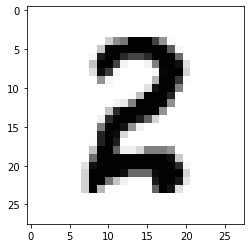

In [7]:
# Lab 7 Learning rate and Evaluation
import tensorflow as tf
import matplotlib.pyplot as plt
import random

from tensorflow.examples.tutorials.mnist import input_data

tf.set_random_seed(777)  # reproducibility

# Check out https://www.tensorflow.org/get_started/mnist/beginners for
# more information about the mnist dataset
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

# input place holders
X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, 10])

# weights & bias for nn layers
W = tf.Variable(tf.random_normal([784, 10])) # 10: out
b = tf.Variable(tf.random_normal([10]))

# parameters
learning_rate = 0.001
batch_size = 100
num_epochs = 50
num_iterations = int(mnist.train.num_examples / batch_size)

hypothesis = tf.matmul(X, W) + b

# define cost/loss & optimizer
cost = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits_v2(
        logits=hypothesis, labels=tf.stop_gradient(Y)
    )
)
train = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

correct_prediction = tf.equal(tf.argmax(hypothesis, axis=1), tf.argmax(Y, axis=1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# train my model
with tf.Session() as sess:
    # initialize
    sess.run(tf.global_variables_initializer())

    for epoch in range(num_epochs):
        avg_cost = 0

        for iteration in range(num_iterations):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            _, cost_val = sess.run([train, cost], feed_dict={X: batch_xs, Y: batch_ys})
            avg_cost += cost_val / num_iterations

        print(f"Epoch: {(epoch + 1):04d}, Cost: {avg_cost:.9f}")

    print("Learning Finished!")

    # Test model and check accuracy
    print(
        "Accuracy:",
        sess.run(accuracy, feed_dict={X: mnist.test.images, Y: mnist.test.labels}),
    )

    # Get one and predict
    r = random.randint(0, mnist.test.num_examples - 1)

    print("Label: ", sess.run(tf.argmax(mnist.test.labels[r : r + 1], axis=1)))
    print(
        "Prediction: ",
        sess.run(
            tf.argmax(hypothesis, axis=1), feed_dict={X: mnist.test.images[r : r + 1]}
        ),
    )

    plt.imshow(
        mnist.test.images[r : r + 1].reshape(28, 28),
        cmap="Greys",
        interpolation="nearest",
    )
    plt.show()


## lab 10-2 mnist_nn

In [8]:
# Lab 10 MNIST and NN
import tensorflow as tf
import random
# import matplotlib.pyplot as plt

from tensorflow.examples.tutorials.mnist import input_data

tf.set_random_seed(777)  # reproducibility

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
# Check out https://www.tensorflow.org/get_started/mnist/beginners for
# more information about the mnist dataset

# parameters
learning_rate = 0.001
training_epochs = 15
batch_size = 100

# input place holders
X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, 10])

# 3단 구성----------------------------------------
# 그 외에는 위와 같음
# weights & bias for nn layers
W1 = tf.Variable(tf.random_normal([784, 256]))
b1 = tf.Variable(tf.random_normal([256]))
L1 = tf.nn.relu(tf.matmul(X, W1) + b1) # X : 입력

W2 = tf.Variable(tf.random_normal([256, 256]))
b2 = tf.Variable(tf.random_normal([256]))
L2 = tf.nn.relu(tf.matmul(L1, W2) + b2) # L1 : 입력

W3 = tf.Variable(tf.random_normal([256, 10]))
b3 = tf.Variable(tf.random_normal([10]))
hypothesis = tf.matmul(L2, W3) + b3 # L2 : 입력

#-------------------------------------------------

# define cost/loss & optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
    logits=hypothesis, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# initialize
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# train my model
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)

    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        feed_dict = {X: batch_xs, Y: batch_ys}
        c, _ = sess.run([cost, optimizer], feed_dict=feed_dict)
        avg_cost += c / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning Finished!')

# Test model and check accuracy
correct_prediction = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print('Accuracy:', sess.run(accuracy, feed_dict={
      X: mnist.test.images, Y: mnist.test.labels}))

# Get one and predict
r = random.randint(0, mnist.test.num_examples - 1)
print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r + 1], 1)))
print("Prediction: ", sess.run(
    tf.argmax(hypothesis, 1), feed_dict={X: mnist.test.images[r:r + 1]}))

# plt.imshow(mnist.test.images[r:r + 1].
#           reshape(28, 28), cmap='Greys', interpolation='nearest')
# plt.show()

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.

Epoch: 0001 cost = 168.208014731
Epoch: 0002 cost = 40.991012852
Epoch: 0003 cost = 25.935853771
Epoch: 0004 cost = 17.971911550
Epoch: 0005 cost = 13.051002725
Epoch: 0006 cost = 9.547788287
Epoch: 0007 cost = 7.128917997
Epoch: 0008 cost = 5.304806846
Epoch: 0009 cost = 4.027370367
Epoch: 0010 cost = 2.984311788
Epoch: 0011 cost = 2.150354028
Epoch: 0012 cost = 1.527995573
Epoch: 0013 cost = 1.172043239
Epoch: 0014 cost = 0.891026049
Epoch: 0015 cost = 0.813401290
Learning Finished!
Accuracy: 0.9447
Label:  [7]
Prediction:  [7]


이전에 비해 3단으로 구성하고 relu를 이용했더니 정확도가 91%에서 94%로 증가

## lab 10-3 mnist_nn_xavier

**xavier**  
- 초기화 중요

In [9]:
# Lab 10 MNIST and Xavier
import tensorflow as tf
import random
# import matplotlib.pyplot as plt

from tensorflow.examples.tutorials.mnist import input_data

tf.set_random_seed(777)  # reproducibility

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
# Check out https://www.tensorflow.org/get_started/mnist/beginners for
# more information about the mnist dataset

# parameters
learning_rate = 0.001
training_epochs = 15
batch_size = 100

# input place holders
X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, 10])

## ----------- 초기화 부분만 바꿈(initializer = tf.contrib.layers.xavier_initializer()) ----------------
# weights & bias for nn layers
# http://stackoverflow.com/questions/33640581/how-to-do-xavier-initialization-on-tensorflow
W1 = tf.get_variable("W1", shape=[784, 256],
                     initializer=tf.contrib.layers.xavier_initializer())
b1 = tf.Variable(tf.random_normal([256]))
L1 = tf.nn.relu(tf.matmul(X, W1) + b1)

W2 = tf.get_variable("W2", shape=[256, 256],
                     initializer=tf.contrib.layers.xavier_initializer())
b2 = tf.Variable(tf.random_normal([256]))
L2 = tf.nn.relu(tf.matmul(L1, W2) + b2)

W3 = tf.get_variable("W3", shape=[256, 10],
                     initializer=tf.contrib.layers.xavier_initializer())
b3 = tf.Variable(tf.random_normal([10]))
hypothesis = tf.matmul(L2, W3) + b3

# define cost/loss & optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
    logits=hypothesis, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# initialize
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# train my model
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)

    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        feed_dict = {X: batch_xs, Y: batch_ys}
        c, _ = sess.run([cost, optimizer], feed_dict=feed_dict)
        avg_cost += c / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning Finished!')

# Test model and check accuracy
correct_prediction = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print('Accuracy:', sess.run(accuracy, feed_dict={
      X: mnist.test.images, Y: mnist.test.labels}))

# Get one and predict
r = random.randint(0, mnist.test.num_examples - 1)
print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r + 1], 1)))
print("Prediction: ", sess.run(
    tf.argmax(hypothesis, 1), feed_dict={X: mnist.test.images[r:r + 1]}))

# plt.imshow(mnist.test.images[r:r + 1].
#           reshape(28, 28), cmap='Greys', interpolation='nearest')
# plt.show()

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Epoch: 0001 cost = 0.307199768
Epoch: 0002 cost = 0.119890542
Epoch: 0003 cost = 0.077080356
Epoch: 0004 cost = 0.054641893
Epoch: 0005 cost = 0.040855790
Epoch: 0006 cost = 0.032292068
Epoch: 0007 cost = 0.025049548
Epoch: 0008 cost = 0.019730244
Epoch: 0009 cost = 0.018946491
Epoch: 0010 cost = 0.016311510
Epoch: 0011 cost = 0.011930740
Epoch: 0012 cost = 0.010030166
Epoch: 0013 cost = 0.012460295
Epoch: 0014 cost = 0.011241207
Epoch: 0015 cost = 0.008011339
Learning Finished!
Accuracy: 0.9801
Label:  [7]
Prediction:  [7]


- 정확도가 98%까지 나왔다.  
- xavier로 하면 처음부터 cost값이 그 전 상황에 비해 현저히 낮은 것을 알 수 있다. 이로 인해 초기값이 잘 설정되었다는 것을 알 수 있다.

## lab 10-4 mnist_nn_deep

In [30]:
# Lab 10 MNIST and Deep learning
import tensorflow as tf
import random
# import matplotlib.pyplot as plt

tf.reset_default_graph()

from tensorflow.examples.tutorials.mnist import input_data

tf.set_random_seed(777)  # reproducibility

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
# Check out https://www.tensorflow.org/get_started/mnist/beginners for
# more information about the mnist dataset

# parameters
learning_rate = 0.001
training_epochs = 15
batch_size = 100

# input place holders
X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, 10])

# 5단, 깊이를 더 깊게! ------------------------------
# weights & bias for nn layers
# http://stackoverflow.com/questions/33640581/how-to-do-xavier-initialization-on-tensorflow
W1 = tf.get_variable("W1", shape=[784, 512],
                     initializer=tf.contrib.layers.xavier_initializer())
b1 = tf.Variable(tf.random_normal([512]))
L1 = tf.nn.relu(tf.matmul(X, W1) + b1)

W2 = tf.get_variable("W2", shape=[512, 512],
                     initializer=tf.contrib.layers.xavier_initializer())
b2 = tf.Variable(tf.random_normal([512]))
L2 = tf.nn.relu(tf.matmul(L1, W2) + b2)

W3 = tf.get_variable("W3", shape=[512, 512],
                     initializer=tf.contrib.layers.xavier_initializer())
b3 = tf.Variable(tf.random_normal([512]))
L3 = tf.nn.relu(tf.matmul(L2, W3) + b3)

W4 = tf.get_variable("W4", shape=[512, 512],
                     initializer=tf.contrib.layers.xavier_initializer())
b4 = tf.Variable(tf.random_normal([512]))
L4 = tf.nn.relu(tf.matmul(L3, W4) + b4)

W5 = tf.get_variable("W5", shape=[512, 10],
                     initializer=tf.contrib.layers.xavier_initializer())
b5 = tf.Variable(tf.random_normal([10]))
hypothesis = tf.matmul(L4, W5) + b5
#----------------------------------------------------

# define cost/loss & optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
    logits=hypothesis, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# initialize
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# train my model
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)

    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        feed_dict = {X: batch_xs, Y: batch_ys}
        c, _ = sess.run([cost, optimizer], feed_dict=feed_dict)
        avg_cost += c / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning Finished!')

# Test model and check accuracy
correct_prediction = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print('Accuracy:', sess.run(accuracy, feed_dict={
      X: mnist.test.images, Y: mnist.test.labels}))

# Get one and predict
r = random.randint(0, mnist.test.num_examples - 1)
print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r + 1], 1)))
print("Prediction: ", sess.run(
    tf.argmax(hypothesis, 1), feed_dict={X: mnist.test.images[r:r + 1]}))

# plt.imshow(mnist.test.images[r:r + 1].
#           reshape(28, 28), cmap='Greys', interpolation='nearest')
# plt.show()


Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Epoch: 0001 cost = 0.295752231
Epoch: 0002 cost = 0.105218059
Epoch: 0003 cost = 0.070946384
Epoch: 0004 cost = 0.051029714
Epoch: 0005 cost = 0.039456466
Epoch: 0006 cost = 0.035175378
Epoch: 0007 cost = 0.030897393
Epoch: 0008 cost = 0.025565091
Epoch: 0009 cost = 0.022748016
Epoch: 0010 cost = 0.020504786
Epoch: 0011 cost = 0.018320958
Epoch: 0012 cost = 0.016122723
Epoch: 0013 cost = 0.015435084
Epoch: 0014 cost = 0.014892553
Epoch: 0015 cost = 0.011196984
Learning Finished!
Accuracy: 0.9763
Label:  [1]
Prediction:  [1]


전보다 깊게 쌓았는데도 정확도가 떨어졌다. 이는 'overfitting'로 인해 발생했고, dropout으로 overfitting의 문제를 해결할 수 있다.

## lab 10-5 mnist_nn_dropout

In [31]:
# Lab 10 MNIST and Dropout
import tensorflow as tf
import random
# import matplotlib.pyplot as plt

tf.reset_default_graph()

from tensorflow.examples.tutorials.mnist import input_data

tf.set_random_seed(777)  # reproducibility

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
# Check out https://www.tensorflow.org/get_started/mnist/beginners for
# more information about the mnist dataset

# parameters
learning_rate = 0.001
training_epochs = 15
batch_size = 100
total_batch = int(mnist.train.num_examples / batch_size)

# input place holders
X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, 10])

# dropout (keep_prob) rate  0.7 on training, but should be 1 for testing
keep_prob = tf.placeholder(tf.float32)

# weights & bias for nn layers
# http://stackoverflow.com/questions/33640581/how-to-do-xavier-initialization-on-tensorflow
W1 = tf.get_variable("W1", shape=[784, 512],
                     initializer=tf.contrib.layers.xavier_initializer())
b1 = tf.Variable(tf.random_normal([512]))
L1 = tf.nn.relu(tf.matmul(X, W1) + b1)
L1 = tf.nn.dropout(L1, keep_prob=keep_prob) # dropout, 입력 : L1
                                            # 몇 %를 끊을 것인지 결정(keep_prob)
                                            # => train : 0.5~0.7, testing : 1

W2 = tf.get_variable("W2", shape=[512, 512],
                     initializer=tf.contrib.layers.xavier_initializer())
b2 = tf.Variable(tf.random_normal([512]))
L2 = tf.nn.relu(tf.matmul(L1, W2) + b2)
L2 = tf.nn.dropout(L2, keep_prob=keep_prob)

W3 = tf.get_variable("W3", shape=[512, 512],
                     initializer=tf.contrib.layers.xavier_initializer())
b3 = tf.Variable(tf.random_normal([512]))
L3 = tf.nn.relu(tf.matmul(L2, W3) + b3)
L3 = tf.nn.dropout(L3, keep_prob=keep_prob)

W4 = tf.get_variable("W4", shape=[512, 512],
                     initializer=tf.contrib.layers.xavier_initializer())
b4 = tf.Variable(tf.random_normal([512]))
L4 = tf.nn.relu(tf.matmul(L3, W4) + b4)
L4 = tf.nn.dropout(L4, keep_prob=keep_prob)

W5 = tf.get_variable("W5", shape=[512, 10],
                     initializer=tf.contrib.layers.xavier_initializer())
b5 = tf.Variable(tf.random_normal([10]))
hypothesis = tf.matmul(L4, W5) + b5

# define cost/loss & optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
    logits=hypothesis, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# initialize
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# train my model
for epoch in range(training_epochs):
    avg_cost = 0

    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        feed_dict = {X: batch_xs, Y: batch_ys, keep_prob: 0.7}
        c, _ = sess.run([cost, optimizer], feed_dict=feed_dict)
        avg_cost += c / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning Finished!')

# Test model and check accuracy
correct_prediction = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print('Accuracy:', sess.run(accuracy, feed_dict={
      X: mnist.test.images, Y: mnist.test.labels, keep_prob: 1}))

# Get one and predict
r = random.randint(0, mnist.test.num_examples - 1)
print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r + 1], 1)))
print("Prediction: ", sess.run(
    tf.argmax(hypothesis, 1), feed_dict={X: mnist.test.images[r:r + 1], keep_prob: 1}))
    # 학습이 끝나면 모든 데이터를 총동원한다는 의미로 keep_prob을 1로 설정해야 한다

# plt.imshow(mnist.test.images[r:r + 1].
#           reshape(28, 28), cmap='Greys', interpolation='nearest')
# plt.show()


Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Epoch: 0001 cost = 0.468649723
Epoch: 0002 cost = 0.168647567
Epoch: 0003 cost = 0.128564032
Epoch: 0004 cost = 0.104995953
Epoch: 0005 cost = 0.088536569
Epoch: 0006 cost = 0.079976538
Epoch: 0007 cost = 0.073714618
Epoch: 0008 cost = 0.068355542
Epoch: 0009 cost = 0.062367035
Epoch: 0010 cost = 0.058536783
Epoch: 0011 cost = 0.057212829
Epoch: 0012 cost = 0.054611103
Epoch: 0013 cost = 0.050547071
Epoch: 0014 cost = 0.043046338
Epoch: 0015 cost = 0.046456152
Learning Finished!
Accuracy: 0.9824
Label:  [3]
Prediction:  [3]


**Summary**  
1. Softmax VS Neural Nets for MNIST (91%, 94%) 
2. Xavier initialization  (98.01 %)
3. Deep Neural Nets with Dropout (97.63% -> 98.24%)  
  - overfitting의 문제는 dropout으로 해결  
4. Adam and other optimizers 
- Adamoptimizer이 좋음  


---
아래는 동영상 강좌X

## lab 10-6 mnist_nn_batchnorm

# Lab: Batchnormalization Layer

## What is a batchnormalization layer?
It is a layer that normalize the output before the activation layer. [The original paper](https://arxiv.org/abs/1502.03167) was proposed by Sergey Ioffe in 2015.

Batch Normalization Layer looks like this: ![bn](https://kratzert.github.io/images/bn_backpass/bn_algorithm.PNG)

## Why batchnormalization?
The distribution of each layer's input changes because the weights of the previous layer change as we update weights by the gradient descent. This is called a covariance shift, which makes the network training difficult.

For example, if the activation layer is a relu layer and the input of the activation layer is shifted to less than zeros, no weights will be activated!

One thing also worth mentioning is that $\gamma$ and $\beta$ parameters in $$ y = \gamma \hat{x} + \beta $$ are also trainable. 

**What it means is that if we don't need the batchnormalization, its parameters will be updated such that it offsets the normalization step.**

For example, assume that

\begin{align}
\gamma &= \sqrt{\sigma^2_B + \epsilon}\\
\beta &= \mu_B
\end{align}

then

$$ y_i = \gamma \hat{x_i} + \beta = x_i $$

Also note that $\mu$ and $\sigma$ are computed using moving averages during the training step. However, during the test time, the computed $\mu$ and $\sigma$ will be used as fixed

## Conclusion
- Always use the batch normalization!

## Enough Talk: how to implement in Tensorflow

### 1. Load Library
- We use the famous MNIST data

In [13]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data
%matplotlib inline

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [14]:
mnist.train.images.shape

(55000, 784)

### 2. Define Model & Solver Class
- Object-Oriented-Programming allows to define multiple model easily
- Why do we separate model and solver classes?
  - We can just swap out the model class in the Solver class when we need a different network architecture
  - Usually we need one solver class

In [15]:
class Model:
    """Network Model Class
    
    Note that this class has only the constructor.
    The actual model is defined inside the constructor.
    
    Attributes
    ----------
    X : tf.float32
        This is a tensorflow placeholder for MNIST images
        Expected shape is [None, 784]
        
    y : tf.float32
        This is a tensorflow placeholder for MNIST labels (one hot encoded)
        Expected shape is [None, 10]
        
    mode : tf.bool
        This is used for the batch normalization
        It's `True` at training time and `False` at test time
        
    loss : tf.float32
        The loss function is a softmax cross entropy
        
    train_op
        This is simply the training op that minimizes the loss
        
    accuracy : tf.float32
        The accuracy operation
        
    
    Examples
    ----------
    >>> model = Model("Batch Norm", 32, 10)

    """
    def __init__(self, name, input_dim, output_dim, hidden_dims=[32, 32], use_batchnorm=True, activation_fn=tf.nn.relu, optimizer=tf.train.AdamOptimizer, lr=0.01):
        """ Constructor
        
        Parameters
        --------
        name : str
            The name of this network
            The entire network will be created under `tf.variable_scope(name)`
            
        input_dim : int
            The input dimension
            In this example, 784
        
        output_dim : int
            The number of output labels
            There are 10 labels
            
        hidden_dims : list (default: [32, 32])
            len(hidden_dims) = number of layers
            each element is the number of hidden units
            
        use_batchnorm : bool (default: True)
            If true, it will create the batchnormalization layer
            
        activation_fn : TF functions (default: tf.nn.relu)
            Activation Function
            
        optimizer : TF optimizer (default: tf.train.AdamOptimizer)
            Optimizer Function
            
        lr : float (default: 0.01)
            Learning rate
        
        """
        with tf.variable_scope(name):
            # Placeholders are defined
            self.X = tf.placeholder(tf.float32, [None, input_dim], name='X')
            self.y = tf.placeholder(tf.float32, [None, output_dim], name='y')
            self.mode = tf.placeholder(tf.bool, name='train_mode')            
            
            # Loop over hidden layers
            net = self.X
            for i, h_dim in enumerate(hidden_dims):
                with tf.variable_scope('layer{}'.format(i)):
                    net = tf.layers.dense(net, h_dim)
                    
                    if use_batchnorm:
                        net = tf.layers.batch_normalization(net, training=self.mode)
                        
                    net = activation_fn(net)
            
            # Attach fully connected layers
            net = tf.contrib.layers.flatten(net)
            net = tf.layers.dense(net, output_dim)
            
            self.loss = tf.nn.softmax_cross_entropy_with_logits(logits=net, labels=self.y)
            self.loss = tf.reduce_mean(self.loss, name='loss')    
            
            # When using the batchnormalization layers,
            # it is necessary to manually add the update operations
            # because the moving averages are not included in the graph            
            update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS, scope=name)
            with tf.control_dependencies(update_ops):                     
                self.train_op = optimizer(lr).minimize(self.loss)
            
            # Accuracy etc 
            softmax = tf.nn.softmax(net, name='softmax')
            self.accuracy = tf.equal(tf.argmax(softmax, 1), tf.argmax(self.y, 1))
            self.accuracy = tf.reduce_mean(tf.cast(self.accuracy, tf.float32))

In [16]:
class Solver:
    """Solver class
    
    This class will contain the model class and session
    
    Attributes
    ----------
    model : Model class
    sess : TF session
        
    Methods
    ----------
    train(X, y)
        Run the train_op and Returns the loss
        
    evaluate(X, y, batch_size=None)
        Returns "Loss" and "Accuracy"
        If batch_size is given, it's computed using batch_size
        because most GPU memories cannot handle the entire training data at once
            
    Example
    ----------
    >>> sess = tf.InteractiveSession()
    >>> model = Model("BatchNorm", 32, 10)
    >>> solver = Solver(sess, model)
    
    # Train
    >>> solver.train(X, y)
    
    # Evaluate
    >>> solver.evaluate(X, y)
    """
    def __init__(self, sess, model):
        self.model = model
        self.sess = sess
        
    def train(self, X, y):
        feed = {
            self.model.X: X,
            self.model.y: y,
            self.model.mode: True
        }
        train_op = self.model.train_op
        loss = self.model.loss
        
        return self.sess.run([train_op, loss], feed_dict=feed)
    
    def evaluate(self, X, y, batch_size=None):
        if batch_size:
            N = X.shape[0]
            
            total_loss = 0
            total_acc = 0
            
            for i in range(0, N, batch_size):
                X_batch = X[i:i + batch_size]
                y_batch = y[i:i + batch_size]
                
                feed = {
                    self.model.X: X_batch,
                    self.model.y: y_batch,
                    self.model.mode: False
                }
                
                loss = self.model.loss
                accuracy = self.model.accuracy
                
                step_loss, step_acc = self.sess.run([loss, accuracy], feed_dict=feed)
                
                total_loss += step_loss * X_batch.shape[0]
                total_acc += step_acc * X_batch.shape[0]
            
            total_loss /= N
            total_acc /= N
            
            return total_loss, total_acc
            
            
        else:
            feed = {
                self.model.X: X,
                self.model.y: y,
                self.model.mode: False
            }
            
            loss = self.model.loss            
            accuracy = self.model.accuracy

            return self.sess.run([loss, accuracy], feed_dict=feed)

### 3. Instantiate Model/Solver classes

In [17]:
input_dim = 784
output_dim = 10
N = 55000

tf.reset_default_graph()
sess = tf.InteractiveSession()

# We create two models: one with the batch norm and other without
bn = Model('batchnorm', input_dim, output_dim, use_batchnorm=True)
nn = Model('no_norm', input_dim, output_dim, use_batchnorm=False)

# We create two solvers: to train both models at the same time for comparison
# Usually we only need one solver class
bn_solver = Solver(sess, bn)
nn_solver = Solver(sess, nn)

Instructions for updating:
Use keras.layers.dense instead.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use keras.layers.BatchNormalization instead.  In particular, `tf.control_dependencies(tf.GraphKeys.UPDATE_OPS)` should not be used (consult the `tf.keras.layers.batch_normalization` documentation).
Instructions for updating:
Use keras.layers.flatten instead.


In [18]:
epoch_n = 10
batch_size = 32

# Save Losses and Accuracies every epoch
# We are going to plot them later
train_losses = []
train_accs = []

valid_losses = []
valid_accs = []

### 4. Run the train step

In [19]:
init = tf.global_variables_initializer()
sess.run(init)

for epoch in range(epoch_n):
    for _ in range(N//batch_size):
        X_batch, y_batch = mnist.train.next_batch(batch_size)
        
        _, bn_loss = bn_solver.train(X_batch, y_batch)
        _, nn_loss = nn_solver.train(X_batch, y_batch)       
    
    b_loss, b_acc = bn_solver.evaluate(mnist.train.images, mnist.train.labels, batch_size)
    n_loss, n_acc = nn_solver.evaluate(mnist.train.images, mnist.train.labels, batch_size)
    
    # Save train losses/acc
    train_losses.append([b_loss, n_loss])
    train_accs.append([b_acc, n_acc])
    print(f'[Epoch {epoch}-TRAIN] Batchnorm Loss(Acc): {b_loss:.5f}({b_acc:.2%}) vs No Batchnorm Loss(Acc): {n_loss:.5f}({n_acc:.2%})')
    
    b_loss, b_acc = bn_solver.evaluate(mnist.validation.images, mnist.validation.labels)
    n_loss, n_acc = nn_solver.evaluate(mnist.validation.images, mnist.validation.labels)
    
    # Save valid losses/acc
    valid_losses.append([b_loss, n_loss])
    valid_accs.append([b_acc, n_acc])
    print(f'[Epoch {epoch}-VALID] Batchnorm Loss(Acc): {b_loss:.5f}({b_acc:.2%}) vs No Batchnorm Loss(Acc): {n_loss:.5f}({n_acc:.2%})')
    print()

[Epoch 0-TRAIN] Batchnorm Loss(Acc): 0.12870(95.88%) vs No Batchnorm Loss(Acc): 0.17724(94.70%)
[Epoch 0-VALID] Batchnorm Loss(Acc): 0.13528(95.76%) vs No Batchnorm Loss(Acc): 0.18201(94.70%)

[Epoch 1-TRAIN] Batchnorm Loss(Acc): 0.11069(96.52%) vs No Batchnorm Loss(Acc): 0.14855(95.50%)
[Epoch 1-VALID] Batchnorm Loss(Acc): 0.12086(96.38%) vs No Batchnorm Loss(Acc): 0.15317(95.76%)

[Epoch 2-TRAIN] Batchnorm Loss(Acc): 0.08492(97.31%) vs No Batchnorm Loss(Acc): 0.13991(95.81%)
[Epoch 2-VALID] Batchnorm Loss(Acc): 0.11326(96.52%) vs No Batchnorm Loss(Acc): 0.17826(95.38%)

[Epoch 3-TRAIN] Batchnorm Loss(Acc): 0.07524(97.66%) vs No Batchnorm Loss(Acc): 0.15600(95.53%)
[Epoch 3-VALID] Batchnorm Loss(Acc): 0.10919(96.90%) vs No Batchnorm Loss(Acc): 0.18731(95.36%)

[Epoch 4-TRAIN] Batchnorm Loss(Acc): 0.06881(97.90%) vs No Batchnorm Loss(Acc): 0.17148(95.05%)
[Epoch 4-VALID] Batchnorm Loss(Acc): 0.10030(97.02%) vs No Batchnorm Loss(Acc): 0.20211(95.06%)

[Epoch 5-TRAIN] Batchnorm Loss(Acc)

### 5. Performance Comparison
* With the batchnormalization, the loss is lower and it's more accurate too!

In [20]:
bn_solver.evaluate(mnist.test.images, mnist.test.labels)

[0.103709176, 0.9691]

In [21]:
nn_solver.evaluate(mnist.test.images, mnist.test.labels)  

[0.18436281, 0.9587]

In [22]:
def plot_compare(loss_list: list, ylim=None, title=None) -> None:
    
    bn = [i[0] for i in loss_list]
    nn = [i[1] for i in loss_list]
    
    plt.figure(figsize=(15, 10))
    plt.plot(bn, label='With BN')
    plt.plot(nn, label='Without BN')
    if ylim:
        plt.ylim(ylim)
        
    if title:
        plt.title(title)
    plt.legend()
    plt.grid('on')
    plt.show()

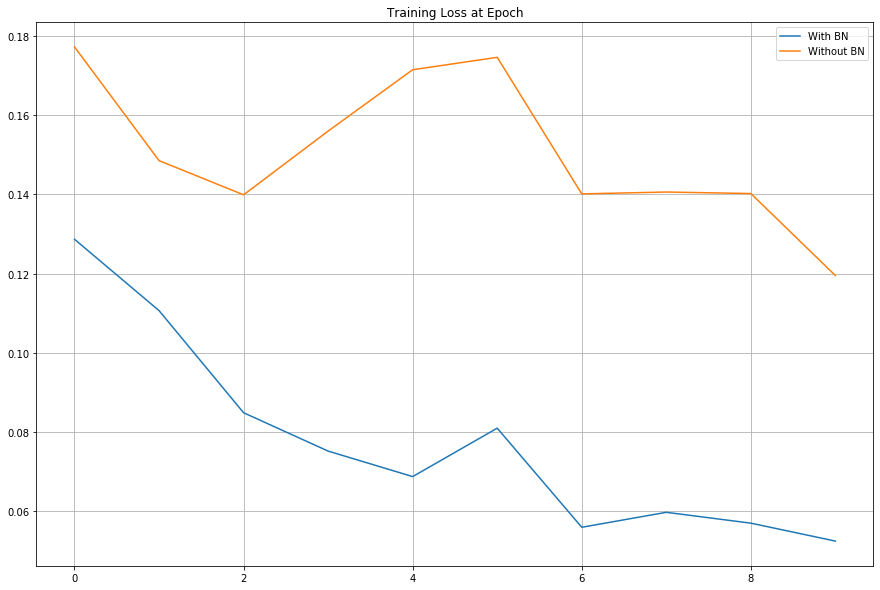

In [23]:
plot_compare(train_losses, title='Training Loss at Epoch')

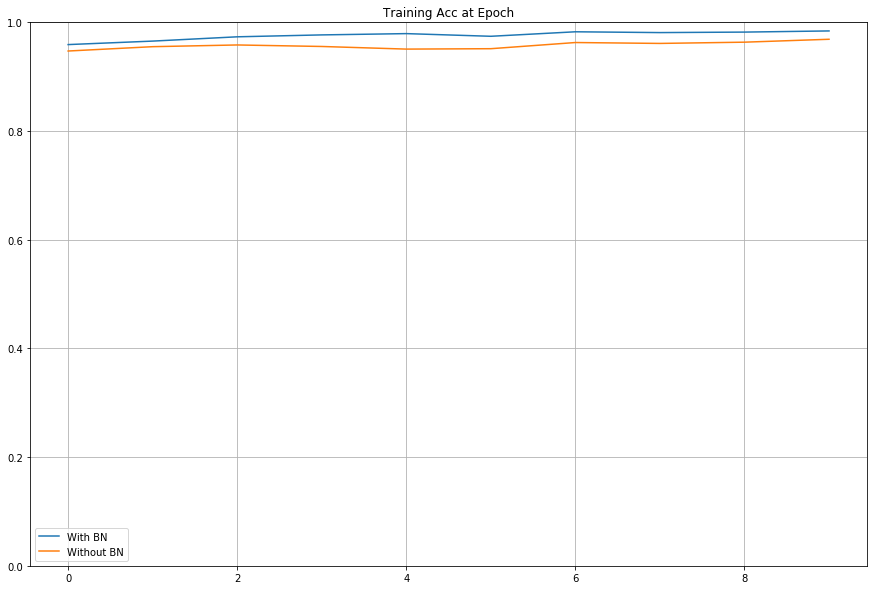

In [24]:
plot_compare(train_accs, [0, 1.0], title="Training Acc at Epoch")

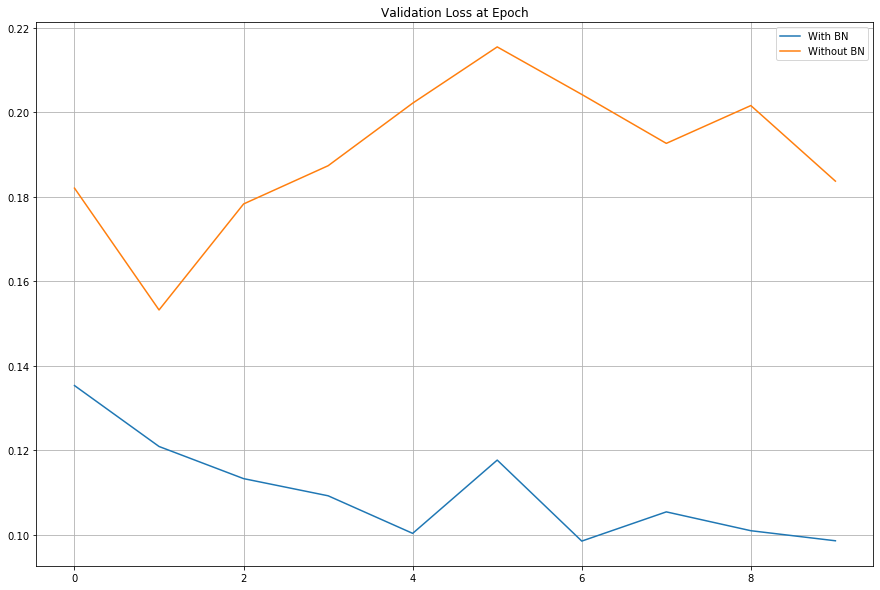

In [25]:
plot_compare(valid_losses, title='Validation Loss at Epoch')

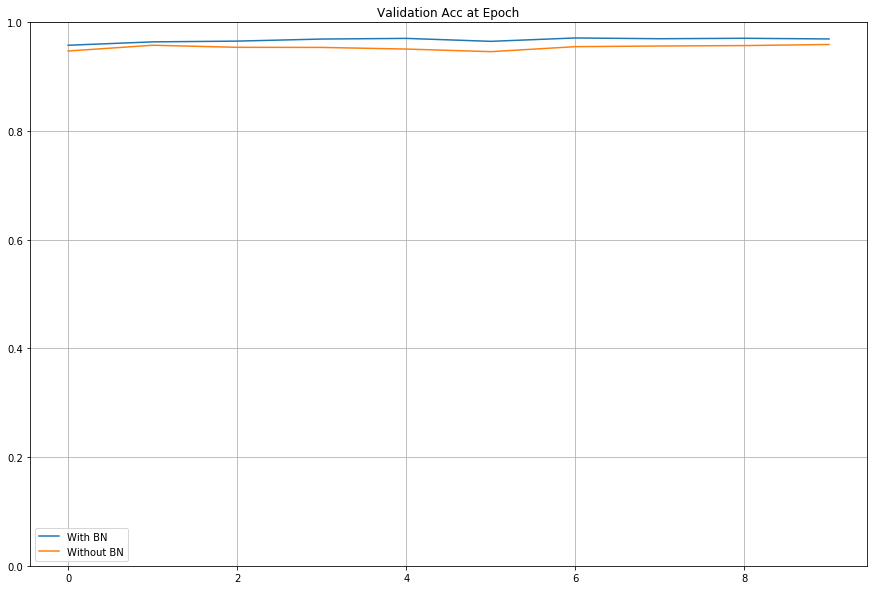

In [26]:
plot_compare(valid_accs, [0, 1.], title='Validation Acc at Epoch')

## lab 10-7 mnist_nn_highter_level_API

In [27]:
# Lab 10 MNIST and High-level TF API
from tensorflow.contrib.layers import fully_connected, batch_norm, dropout
from tensorflow.contrib.framework import arg_scope
import tensorflow as tf
import random
# import matplotlib.pyplot as plt

from tensorflow.examples.tutorials.mnist import input_data

tf.set_random_seed(777)  # reproducibility

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
# Check out https://www.tensorflow.org/get_started/mnist/beginners for
# more information about the mnist dataset

# parameters
learning_rate = 0.01  # we can use large learning rate using Batch Normalization
training_epochs = 15
batch_size = 100
keep_prob = 0.7

# input place holders
X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, 10])
train_mode = tf.placeholder(tf.bool, name='train_mode')

# layer output size
hidden_output_size = 512
final_output_size = 10

xavier_init = tf.contrib.layers.xavier_initializer()
bn_params = {
    'is_training': train_mode,
    'decay': 0.9,
    'updates_collections': None
}

# We can build short code using 'arg_scope' to avoid duplicate code
# same function with different arguments
with arg_scope([fully_connected],
               activation_fn=tf.nn.relu,
               weights_initializer=xavier_init,
               biases_initializer=None,
               normalizer_fn=batch_norm,
               normalizer_params=bn_params
               ):
    hidden_layer1 = fully_connected(X, hidden_output_size, scope="h1")
    h1_drop = dropout(hidden_layer1, keep_prob, is_training=train_mode)
    hidden_layer2 = fully_connected(h1_drop, hidden_output_size, scope="h2")
    h2_drop = dropout(hidden_layer2, keep_prob, is_training=train_mode)
    hidden_layer3 = fully_connected(h2_drop, hidden_output_size, scope="h3")
    h3_drop = dropout(hidden_layer3, keep_prob, is_training=train_mode)
    hidden_layer4 = fully_connected(h3_drop, hidden_output_size, scope="h4")
    h4_drop = dropout(hidden_layer4, keep_prob, is_training=train_mode)
    hypothesis = fully_connected(h4_drop, final_output_size, activation_fn=None, scope="hypothesis")


# define cost/loss & optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
    logits=hypothesis, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# initialize
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# train my model
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)

    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        feed_dict_train = {X: batch_xs, Y: batch_ys, train_mode: True}
        feed_dict_cost = {X: batch_xs, Y: batch_ys, train_mode: False}
        opt = sess.run(optimizer, feed_dict=feed_dict_train)
        c = sess.run(cost, feed_dict=feed_dict_cost)
        avg_cost += c / total_batch

    print("[Epoch: {:>4}] cost = {:>.9}".format(epoch + 1, avg_cost))
    #print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning Finished!')

# Test model and check accuracy
correct_prediction = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print('Accuracy:', sess.run(accuracy, feed_dict={
      X: mnist.test.images, Y: mnist.test.labels, train_mode: False}))

# Get one and predict
r = random.randint(0, mnist.test.num_examples - 1)
print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r + 1], 1)))
print("Prediction: ", sess.run(
    tf.argmax(hypothesis, 1), feed_dict={X: mnist.test.images[r:r + 1], train_mode: False}))

# plt.imshow(mnist.test.images[r:r + 1].
#           reshape(28, 28), cmap='Greys', interpolation='nearest')
# plt.show()


Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


[Epoch:    1] cost = 0.388544051
[Epoch:    2] cost = 0.331142903
[Epoch:    3] cost = 0.321601422
[Epoch:    4] cost = 0.316322112
[Epoch:    5] cost = 0.312203529
[Epoch:    6] cost = 0.309514844
[Epoch:    7] cost = 0.306910588
[Epoch:    8] cost = 0.306832166
[Epoch:    9] cost = 0.304122747
[Epoch:   10] cost = 0.304269895
[Epoch:   11] cost = 0.30304266
[Epoch:   12] cost = 0.301246973
[Epoch:   13] cost = 0.301975829
[Epoch:   14] cost = 0.301136376
[Epoch:   15] cost = 0.301658842
Learning Finished!
Accuracy: 0.9863
Label:  [6]
Prediction:  [6]


## lab 10-8 mnist_nn_selu(wip)

In [28]:
# Lab 10 MNIST and Dropout
# SELU implementation from https://github.com/bioinf-jku/SNNs/blob/master/selu.py
import tensorflow as tf
import random
# import matplotlib.pyplot as plt
# -*- coding: utf-8 -*-
'''
Tensorflow Implementation of the Scaled ELU function and Dropout
'''

import numbers
from tensorflow.contrib import layers
from tensorflow.python.framework import ops
from tensorflow.python.framework import tensor_shape
from tensorflow.python.framework import tensor_util
from tensorflow.python.ops import math_ops
from tensorflow.python.ops import random_ops
from tensorflow.python.ops import array_ops
from tensorflow.python.layers import utils

from tensorflow.examples.tutorials.mnist import input_data

tf.set_random_seed(777)  # reproducibility

def selu(x):
    with ops.name_scope('elu') as scope:
        alpha = 1.6732632423543772848170429916717
        scale = 1.0507009873554804934193349852946
        return scale*tf.where(x>=0.0, x, alpha*tf.nn.elu(x))


def dropout_selu(x, keep_prob, alpha= -1.7580993408473766, fixedPointMean=0.0, fixedPointVar=1.0,
                 noise_shape=None, seed=None, name=None, training=False):
    """Dropout to a value with rescaling."""

    def dropout_selu_impl(x, rate, alpha, noise_shape, seed, name):
        keep_prob = 1.0 - rate
        x = ops.convert_to_tensor(x, name="x")
        if isinstance(keep_prob, numbers.Real) and not 0 < keep_prob <= 1:
            raise ValueError("keep_prob must be a scalar tensor or a float in the "
                                             "range (0, 1], got %g" % keep_prob)
        keep_prob = ops.convert_to_tensor(keep_prob, dtype=x.dtype, name="keep_prob")
        keep_prob.get_shape().assert_is_compatible_with(tensor_shape.scalar())

        alpha = ops.convert_to_tensor(alpha, dtype=x.dtype, name="alpha")
        keep_prob.get_shape().assert_is_compatible_with(tensor_shape.scalar())

        if tensor_util.constant_value(keep_prob) == 1:
            return x

        noise_shape = noise_shape if noise_shape is not None else array_ops.shape(x)
        random_tensor = keep_prob
        random_tensor += random_ops.random_uniform(noise_shape, seed=seed, dtype=x.dtype)
        binary_tensor = math_ops.floor(random_tensor)
        ret = x * binary_tensor + alpha * (1-binary_tensor)

        a = tf.sqrt(fixedPointVar / (keep_prob *((1-keep_prob) * tf.pow(alpha-fixedPointMean,2) + fixedPointVar)))

        b = fixedPointMean - a * (keep_prob * fixedPointMean + (1 - keep_prob) * alpha)
        ret = a * ret + b
        ret.set_shape(x.get_shape())
        return ret

    with ops.name_scope(name, "dropout", [x]) as name:
        return utils.smart_cond(training,
                                lambda: dropout_selu_impl(x, keep_prob, alpha, noise_shape, seed, name),
                                lambda: array_ops.identity(x))

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
# Check out https://www.tensorflow.org/get_started/mnist/beginners for
# more information about the mnist dataset

# parameters
learning_rate = 0.001
training_epochs = 50
batch_size = 100

# input place holders
X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, 10])

# dropout (keep_prob) rate  0.7 on training, but should be 1 for testing
keep_prob = tf.placeholder(tf.float32)

# weights & bias for nn layers
# http://stackoverflow.com/questions/33640581/how-to-do-xavier-initialization-on-tensorflow
W1 = tf.get_variable("W1", shape=[784, 512],
                     initializer=tf.contrib.layers.xavier_initializer())
b1 = tf.Variable(tf.random_normal([512]))
L1 = selu(tf.matmul(X, W1) + b1)
L1 = dropout_selu(L1, keep_prob=keep_prob)

W2 = tf.get_variable("W2", shape=[512, 512],
                     initializer=tf.contrib.layers.xavier_initializer())
b2 = tf.Variable(tf.random_normal([512]))
L2 = selu(tf.matmul(L1, W2) + b2)
L2 = dropout_selu(L2, keep_prob=keep_prob)

W3 = tf.get_variable("W3", shape=[512, 512],
                     initializer=tf.contrib.layers.xavier_initializer())
b3 = tf.Variable(tf.random_normal([512]))
L3 = selu(tf.matmul(L2, W3) + b3)
L3 = dropout_selu(L3, keep_prob=keep_prob)

W4 = tf.get_variable("W4", shape=[512, 512],
                     initializer=tf.contrib.layers.xavier_initializer())
b4 = tf.Variable(tf.random_normal([512]))
L4 = selu(tf.matmul(L3, W4) + b4)
L4 = dropout_selu(L4, keep_prob=keep_prob)

W5 = tf.get_variable("W5", shape=[512, 10],
                     initializer=tf.contrib.layers.xavier_initializer())
b5 = tf.Variable(tf.random_normal([10]))
hypothesis = tf.matmul(L4, W5) + b5

# define cost/loss & optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
    logits=hypothesis, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# initialize
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# train my model
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)

    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        feed_dict = {X: batch_xs, Y: batch_ys, keep_prob: 0.7}
        c, _ = sess.run([cost, optimizer], feed_dict=feed_dict)
        avg_cost += c / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning Finished!')

# Test model and check accuracy
correct_prediction = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print('Accuracy:', sess.run(accuracy, feed_dict={
      X: mnist.test.images, Y: mnist.test.labels, keep_prob: 1}))

# Get one and predict
r = random.randint(0, mnist.test.num_examples - 1)
print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r + 1], 1)))
print("Prediction: ", sess.run(
    tf.argmax(hypothesis, 1), feed_dict={X: mnist.test.images[r:r + 1], keep_prob: 1}))

# plt.imshow(mnist.test.images[r:r + 1].
#           reshape(28, 28), cmap='Greys', interpolation='nearest')
# plt.show()

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch: 0001 cost = 0.502236409
Epoch: 0002 cost = 0.160141029
Epoch: 0003 cost = 0.121660633
Epoch: 0004 cost = 0.105875454
Epoch: 0005 cost = 0.092529583
Epoch: 0006 cost = 0.093431226
Epoch: 0007 cost = 0.086071161
Epoch: 0008 cost = 0.084994266
Epoch: 0009 cost = 0.068686880
Epoch: 0010 cost = 0.070737539
Epoch: 0011 cost = 0.068096913
Epoch: 0012 cost = 0.067193938
Epoch: 0013 cost = 0.052869812
Epoch: 0014 cost = 0.047937419
Epoch: 0015 cost = 0.058893094
Epoch: 0016 cost = 0.051925723
Epoch: 0017 cost = 0.045355354
Epoch: 0018 cost = 0.048595541
Epoch: 0019 cost = 0.040914246
Epoch: 0020 cost = 0.039435160
Epoch: 0021 cost = 0.045947740
Epoch: 0022 cost = 0.037042140
Epoch: 0023 cost = 0.036457674

## lab 10-X1 mnist_back_prop

In [29]:
# http://blog.aloni.org/posts/backprop-with-tensorflow/
# https://medium.com/@karpathy/yes-you-should-understand-backprop-e2f06eab496b#.b3rvzhx89
import tensorflow as tf

tf.set_random_seed(777)  # reproducibility

# Check out https://www.tensorflow.org/get_started/mnist/beginners for
# more information about the mnist dataset
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, 10])

w1 = tf.Variable(tf.truncated_normal([784, 30]))
b1 = tf.Variable(tf.truncated_normal([1, 30]))
w2 = tf.Variable(tf.truncated_normal([30, 10]))
b2 = tf.Variable(tf.truncated_normal([1, 10]))


def sigma(x):
    #  sigmoid function
    return tf.div(tf.constant(1.0),
                  tf.add(tf.constant(1.0), tf.exp(-x)))


def sigma_prime(x):
    # derivative of the sigmoid function
    return sigma(x) * (1 - sigma(x))

# Forward prop
l1 = tf.add(tf.matmul(X, w1), b1)
a1 = sigma(l1)
l2 = tf.add(tf.matmul(a1, w2), b2)
y_pred = sigma(l2)

# diff
assert y_pred.shape.as_list() == Y.shape.as_list()
diff = (y_pred - Y)


# Back prop (chain rule)
d_l2 = diff * sigma_prime(l2)
d_b2 = d_l2
d_w2 = tf.matmul(tf.transpose(a1), d_l2)

d_a1 = tf.matmul(d_l2, tf.transpose(w2))
d_l1 = d_a1 * sigma_prime(l1)
d_b1 = d_l1
d_w1 = tf.matmul(tf.transpose(X), d_l1)


# Updating network using gradients
learning_rate = 0.5
step = [
    tf.assign(w1, w1 - learning_rate * d_w1),
    tf.assign(b1, b1 - learning_rate *
              tf.reduce_mean(d_b1, reduction_indices=[0])),
    tf.assign(w2, w2 - learning_rate * d_w2),
    tf.assign(b2, b2 - learning_rate *
              tf.reduce_mean(d_b2, reduction_indices=[0]))
]

# 7. Running and testing the training process
acct_mat = tf.equal(tf.argmax(y_pred, 1), tf.argmax(Y, 1))
acct_res = tf.reduce_sum(tf.cast(acct_mat, tf.float32))

sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())

for i in range(10000):
    batch_xs, batch_ys = mnist.train.next_batch(10)
    sess.run(step, feed_dict={X: batch_xs,
                              Y: batch_ys})
    if i % 1000 == 0:
        res = sess.run(acct_res, feed_dict={X: mnist.test.images[:1000],
                                            Y: mnist.test.labels[:1000]})
        print(res)

# 8. Automatic differentiation in TensorFlow
cost = diff * diff
step = tf.train.GradientDescentOptimizer(0.1).minimize(cost)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.


C:\Users\dldms\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1735: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


94.0
835.0
881.0
896.0
900.0
908.0
907.0
902.0
911.0
924.0
